In [1]:
import sys
import warnings
import math as m
import numpy as np
import pandas as pd
import tensorly as tl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import acf

import scipy
from scipy.linalg import hankel
from scipy.signal import find_peaks
from scipy.spatial import distance_matrix

import visuals

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin

import matplotlib.animation as animation



In [3]:
# fig = plt.figure(figsize=(5, 4))
# ax = fig.add_subplot(autoscale_on=False, xlim=(-L, L), ylim=(-L, 1.))
# ax.set_aspect('equal')
# ax.grid()

# line, = ax.plot([], [], 'o-', lw=2)
# trace, = ax.plot([], [], '.-', lw=1, ms=2)
# time_template = 'time = %.1fs'
# time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


# def animate(i):
#     thisx = [0, x1[i], x2[i]]
#     thisy = [0, y1[i], y2[i]]

#     history_x = x2[:i]
#     history_y = y2[:i]

#     line.set_data(thisx, thisy)
#     trace.set_data(history_x, history_y)
#     time_text.set_text(time_template % (i*dt))
#     return line, trace, time_text


# ani = animation.FuncAnimation(fig, animate, len(y), interval=dt*1000, blit=True)
# plt.show()

In [4]:
plt.rcParams['font.family'] = 'DejaVu Serif'

In [5]:
def delay_embedding_matrix(s, nlags):
    """Make a matrix with delay embeddings.

    Parameters
    ----------
    s : np.array
        The time series data.

    nlags : int
        Size of time lags.

    Returns
    -------
    delay_embedding_matrix : np.array of shape  (len(s) - lags + 1 , lags)
        Matrix with lags.
    """ 
    N = len(s)
    delay_embedding_matrix = hankel(s[ : N - nlags + 1], s[N - nlags : N])
    return delay_embedding_matrix

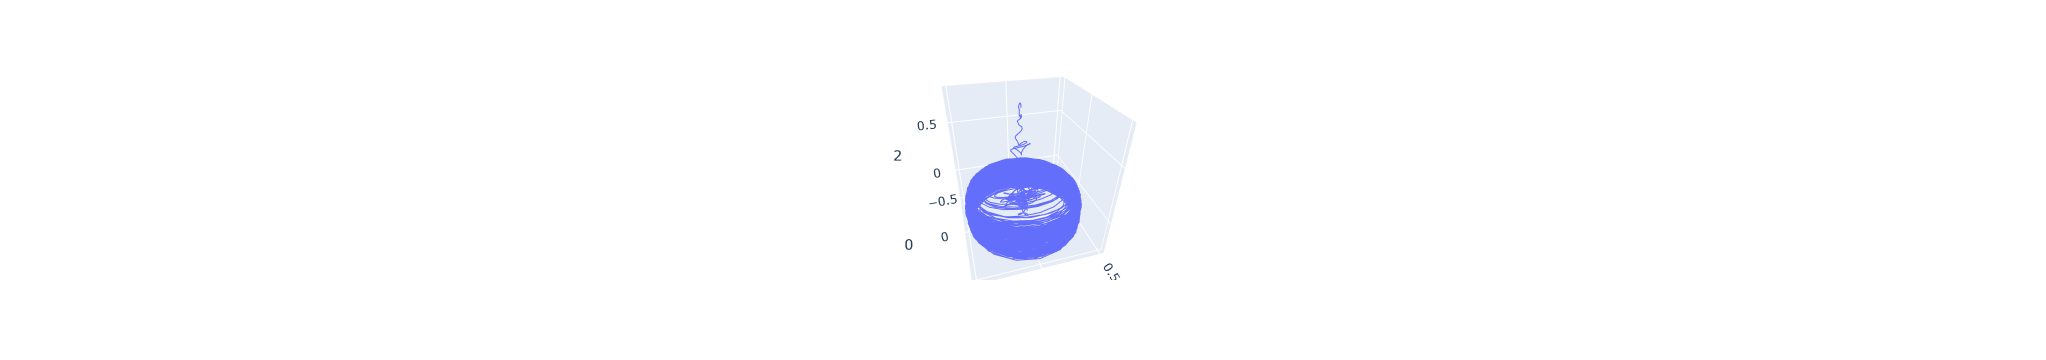

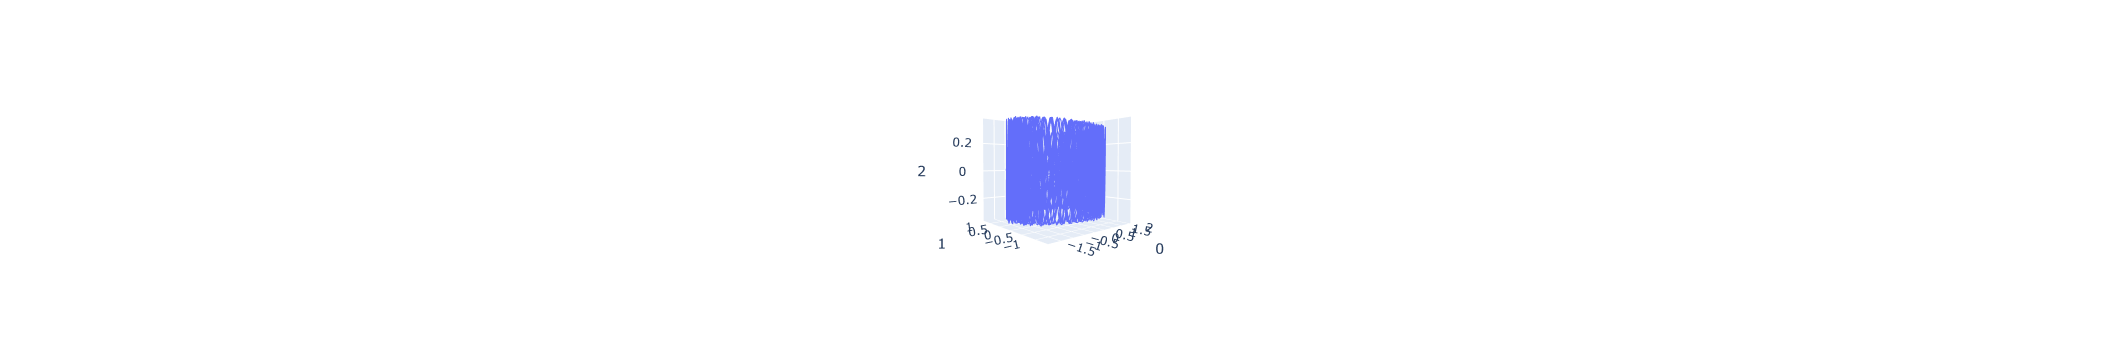

In [36]:
G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 0.1  # length of pendulum 2 in m
L = L1 + L2  # maximal length of the combined pendulum
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg
t_stop = 50  # how many seconds to simulate
# history_len = 500  # how many trajectory points to display


def derivs(t, state):
    dydx = np.zeros_like(state)

    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx

# create a time array from 0..t_stop sampled at 0.02 second steps
dt = 0.01
t = np.arange(0, t_stop, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 10.0
w1 = 0.0
th2 = 0.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate the ODE using Euler's method
y = np.empty((len(t), 4))
y[0] = state
for i in range(1, len(t)):
    y[i] = y[i - 1] + derivs(t[i - 1], y[i - 1]) * dt

# A more accurate estimate could be obtained e.g. using scipy:
#
#   y = scipy.integrate.solve_ivp(derivs, t[[0, -1]], state, t_eval=t).y.T

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

s = PCA(4).fit_transform(delay_embedding_matrix(y2,50)) 
# visuals.plot_phase_trajectory(s, rotation=(30, 20, 10))
# # plt.plot(x1)|
fig = px.line_3d(pd.DataFrame(s), x=0, y=1, z=2)
# fig.update_traces(marker=dict(size=2))
fig.show()

s = PCA(4).fit_transform(delay_embedding_matrix(x2,70)) 
# visuals.plot_phase_trajectory(s, rotation=(30, 20, 10))
# # plt.plot(x1)|
fig = px.line_3d(pd.DataFrame(s), x=0, y=1, z=2)
# fig.update_traces(marker=dict(size=2))
fig.show()

In [34]:
import plotly.graph_objects as go

import numpy as np

In [29]:
# !{sys.executable} -m jupyter labextension list

In [7]:
import plotly.express as px

In [ ]:
def prepare_time_series(path, centred = True):
    data = pd.read_csv(path, delimiter =';', decimal=',')
    
    time_series = data[['X_value', 'Y_value', 'Z_value']]
    
    if centred:
        time_series = (time_series - np.mean(time_series, axis = 0))/np.std(time_series, axis = 0)
        
    time_points = (data['time'].values).astype(float).reshape([-1,])
    time_points = np.linspace(0,time_points[-1]-time_points[0],time_series.shape[0])

    return time_series,time_points

In [ ]:
path_basic_experiment = ['walk', 'stairs','bike', 'squats']
data_limits = [(7000,14000), (2300,7500), (14260,22548),  (4000,12000)]

In [ ]:
index_activity = 0
x_acc, t = prepare_time_series(f'./../data/basic_experiment_{path_basic_experiment[index_activity]}.csv', centred = True)
x_acc = x_acc[data_limits[index_activity][0]:data_limits[index_activity][1]:]
res = x_acc.reset_index(drop=True).loc[:2500].plot(figsize=(7,4)).get_figure()
res.savefig(f'./../slides/figs/init_time_series_{path_basic_experiment[index_activity]}.png')


S = np.array([
    delay_embedding_matrix(x_acc['X_value'].to_numpy(), 500),
    delay_embedding_matrix(x_acc['Y_value'].to_numpy(), 500),
    delay_embedding_matrix(x_acc['Z_value'].to_numpy(), 500)
])
for i, s in enumerate(S):
    visuals.plot_phase_trajectory(PCA(4).fit_transform(s)[::3,:3], path = f'./../slides/figs/phase_traj_{i}_PCA_{path_basic_experiment[index_activity]}.png')
s = delay_embedding_matrix((x_acc[['X_value','Y_value','Z_value']]**2).sum(axis=1)**0.5,500)
visuals.plot_phase_trajectory(PCA(4).fit_transform(s)[::3,:3])

In [ ]:
# x_acc, t = prepare_time_series(f'./../data/basic_experiment_{path_basic_experiment[index_activity]}.csv', centred = True)
# x_acc = x_acc[data_limits[index_activity][0]:data_limits[index_activity][1]:]
# x_acc.loc[:].plot(figsize=(16,4))
# S = np.array([
#     delay_embedding_matrix(x_acc['X_value'].to_numpy(), 10),
#     delay_embedding_matrix(x_acc['Y_value'].to_numpy(), 10),
#     delay_embedding_matrix(x_acc['Z_value'].to_numpy(), 10)
# ])
# for s in S:
#     visuals.plot_phase_trajectory(PCA(4).fit_transform(s)[::,:3])

In [ ]:
A_0 = tl.random.random_tensor((10, 10, 10, 3))

In [ ]:
tl.tenalg.outer([S[n,0,:] for n in range(S.shape[0])]).shape

In [ ]:
# tl.tenalg.multi_mode_dot(A_0, [S[n,0,:] for n in range(S.shape[0])])

In [ ]:
# tl.tenalg.inner(tl.tenalg.outer([S[n,0,:] for n in range(S.shape[0])]), A_0, n_modes = 3)

In [ ]:
# tensor_A_0, modes_A_0

In [ ]:
global_iter = 0

In [ ]:
40* 40* 40* 3

In [ ]:
def func(A, shape = (40, 40, 40, 3), S = S):
    global global_iter
    global_iter+=1
    if global_iter %1000 == 0: print('|', end='')
    ################################################
    ## Make a dynamic tensor A #####################
    A = A.reshape(shape)
    ################################################
    ## Make a subspace #############################
    X_p = []
    for i in range(S.shape[1]):
        X_p.append(tl.tenalg.multi_mode_dot(A, [S[n,i,:] for n in range(S.shape[0])]))
    X_p = np.array(X_p)
    ################################################
    ## Precalc a tensor with low dim vectors #######
    list_A_S = [tl.tenalg.mode_dot(A, vec, mode=S.shape[0])  for vec in X_p]
    ################################################
    ## Calc mse among initial time series ##########
    list_S_hat = []
    mse_error = 0
    for dim_index in range(S.shape[0]):
        modes_all = np.arange(S.shape[0])
        modes = np.delete(modes_all, dim_index, axis=0).astype(int).tolist()
        
        S_hat = []
        for time_index in range(S.shape[1]):
            S_hat.append(tl.tenalg.multi_mode_dot(list_A_S[time_index], [S[n,i,:] for n in modes], modes = modes))
        S_hat = np.array(S_hat)
    
        mse_error += np.mean((S[dim_index]-S_hat)**2)**0.5
    return mse_error

In [ ]:
from scipy.optimize import minimize

In [ ]:
# res = minimize(func, A_0.reshape(-1,), options = {'maxiter':1000, 'adaptive':True})

In [ ]:
# X_p = []
# for i in range(S.shape[1]):
#     X_p.append(tl.tenalg.multi_mode_dot(res['x'].reshape((10, 10, 10, 3)), [S[n,i,:] for n in range(S.shape[0])]))
# X_p = np.array(X_p)

In [ ]:
# visuals.plot_phase_trajectory(X_p)

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [ ]:
print('Pytorch CUDA Version is', torch.version.cuda)

In [ ]:
index_activity = 0
shape_dims = [6, 3]

In [ ]:
# x_acc, t = prepare_time_series(f'./../data/basic_experiment_{path_basic_experiment[index_activity]}.csv', centred = True)

In [ ]:
x_acc, t = prepare_time_series(f'./../data/basic_experiment_{path_basic_experiment[index_activity]}.csv', centred = True)
# x_acc = x_acc[data_limits[index_activity][0]:data_limits[index_activity][1]+:40]
x_acc = x_acc[data_limits[index_activity][0]:data_limits[index_activity][1]+10_000:]
# S = np.array([
#     delay_embedding_matrix(x_acc['X_value'].to_numpy(), shape_dims[0]),
#     delay_embedding_matrix(x_acc['Y_value'].to_numpy(), shape_dims[0]),
#     delay_embedding_matrix(x_acc['Z_value'].to_numpy(), shape_dims[0])
# ])

S = np.array([
    PCA(shape_dims[0]).fit_transform(delay_embedding_matrix(x_acc['X_value'].to_numpy(), 500)),
    PCA(shape_dims[0]).fit_transform(delay_embedding_matrix(x_acc['Y_value'].to_numpy(), 500)),
    PCA(shape_dims[0]).fit_transform(delay_embedding_matrix(x_acc['Z_value'].to_numpy(), 500))
])

################################################
## Make a subspace #############################
X_p = []
for i in range(S.shape[1]):
    X_p.append(tl.tenalg.outer([S[n,i,:] for n in range(S.shape[0])]).reshape(-1,))
X_p = np.array(X_p)

In [ ]:
X_p.shape

In [ ]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')
x = torch.from_numpy(X_p).to(device)

In [ ]:
class Autoencoder(nn.Module):
    def __init__(self, in_shape, enc_shape):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_shape, enc_shape, dtype=float))
        
    def forward(self, x):
        x = nn.functional.linear(x, self.weight.T)
        x = nn.functional.linear(x, self.weight)
        return x

In [ ]:
encoder = Autoencoder(in_shape=shape_dims[0]**3, enc_shape=shape_dims[1]).double().to(device)

error = nn.MSELoss()

optimizer = optim.Adam(encoder.parameters())

In [ ]:
def train(model, error, optimizer, n_epochs, x):
    model.train()
    for epoch in range(1, n_epochs + 1):
        optimizer.zero_grad()
        output = model(x)
        loss = error(output, x)
        loss.backward()
        optimizer.step()
        
        if epoch % int(0.1*n_epochs) == 0:
            print(f'epoch {epoch} \t Loss: {loss.item():.4g}')

In [ ]:
# !pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0

In [ ]:
%%time
train(encoder, error, optimizer, 10000, x)

In [ ]:
with torch.no_grad():
    encoded = nn.functional.linear(x, encoder.weight.T)
    enc = encoded.cpu().detach().numpy()

In [ ]:
# with torch.no_grad():
#     encoded = encoder.encode(x)
#     decoded = encoder.decode(encoded)
#     mse = error(decoded, x).item()
#     enc = encoded.cpu().detach().numpy()
#     dec = decoded.cpu().detach().numpy()

In [ ]:
visuals.plot_phase_trajectory(enc[:4000], rotation = (0,90, 0)) 